In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = (16, 5)
import sys
sys.path.append('../core/')
import data_download as dd
import data_plot as dp
import data_parser as parse

In [2]:
dd.verify_update()
dataset = parse.setup_datasets()


Data provided by AGES.
AGES database already exists locally. Checking for update...

Successfully unzipped and installed database.
The AGES database is up-to-date.


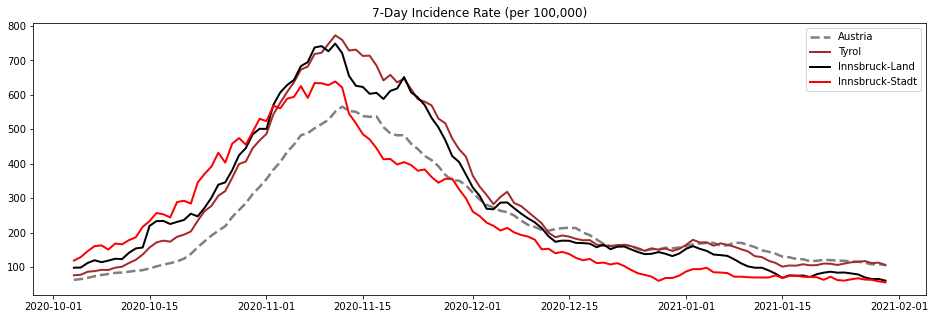

In [3]:
dp.plot_seven_day_incidence(dataset, -120)

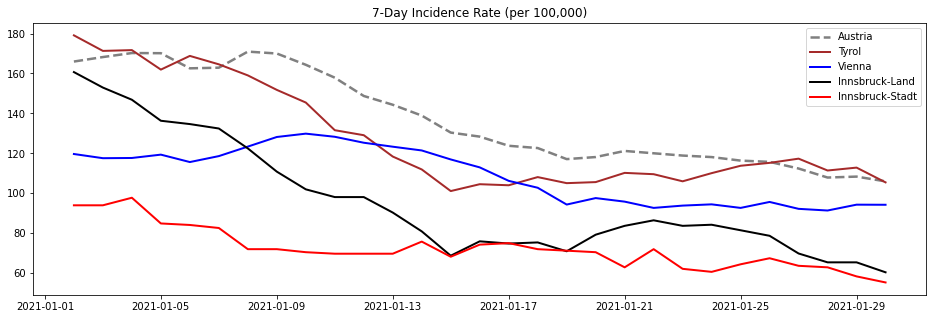

In [4]:
dp.plot_seven_day_incidence(dataset, -30, vienna="yes", innsbruck_land="yes", innsbruck_city="yes")

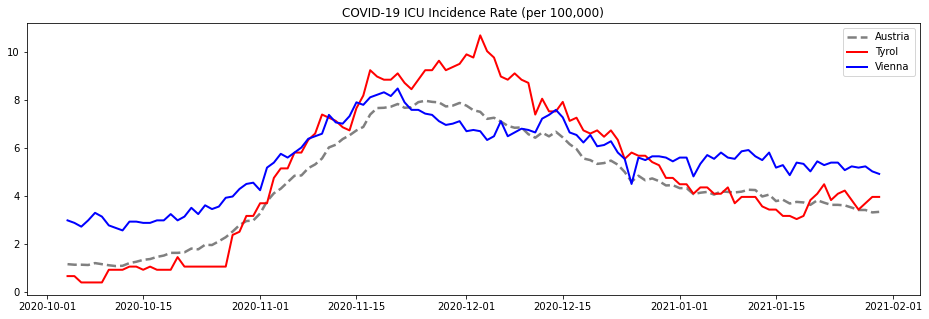

In [5]:
dp.plot_icu_incidence(dataset,-120)

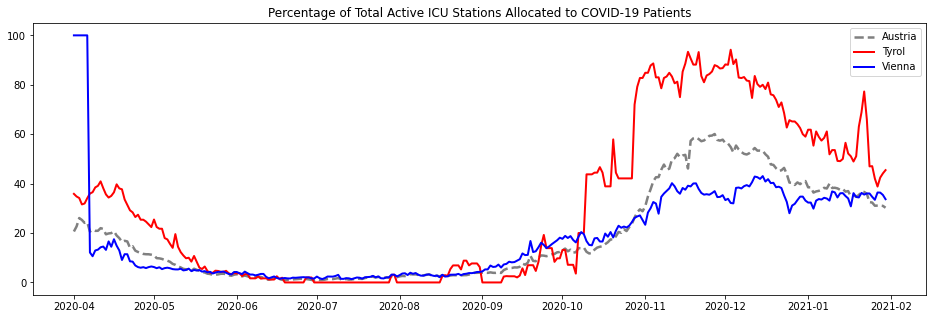

In [6]:
dp.plot_icu_percentages(dataset,0)